<a href="https://colab.research.google.com/github/Shreya200326/CapX/blob/main/Capx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install praw
import re
from collections import Counter
from textblob import TextBlob
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.1 MB/s eta 0:00:00


In [2]:
!pip install matplotlib pandas seaborn


In [3]:
pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 13.1 MB/s eta 0:00:00


In [4]:
import nest_asyncio
nest_asyncio.apply()

In [43]:
import praw
import asyncpraw
import pandas as pd
import asyncio


In [44]:
async def main():
    reddit = asyncpraw.Reddit(
        client_id='Cj1v99waA7sQLep9PH6yZA',
        client_secret='D7XwLuoMbm7xusItSJuzQQiWQiV8DA',
        user_agent='Capx1 Sentiment Analysis v1.0 (by /u/yourusername)'
    )

    subreddit = await reddit.subreddit('stockstobuytoday')
    data=[]


    try:
        # Fetch top posts asynchronously and collect them in a list
        async for post in subreddit.top(limit=100):
            data.append([post.title, post.selftext, post.created_utc])
    except Exception as e:
        print(f"Error fetching posts: {e}")

    return data

    async for post in subreddit.top(limit=100):
        data.append([post.title, post.selftext, post.created_utc])

    df = pd.DataFrame(data, columns=['Title', 'Body', 'Created'])
    print(df)
await main()

[['*NEW PR!* $PIXY "ShiftPixy Labs Announces Development of Mobile Food Ordering Apps That Elevate Customer Engagement with Cutting-Edge Technology"',
  "***Link to PR:*** [*https://www.businesswire.com/news/home/20230217005009/en/ShiftPixy-Labs-Announces-Development-of-Mobile-Food-Ordering-Apps-That-Elevate-Customer-Engagement-with-Cutting-Edge-Technology*](https://www.businesswire.com/news/home/20230217005009/en/ShiftPixy-Labs-Announces-Development-of-Mobile-Food-Ordering-Apps-That-Elevate-Customer-Engagement-with-Cutting-Edge-Technology)\n\n*Insane gap up at open on the news out pre market this morning. Massive selling followed... keep an eye on this one, it's still way oversold. Shared the news on the sub from earlier in the week as well. Looks like the company is rolling again. Last time we saw this type of news flow from the company at this price, we saw a two session move to $10+. On heavy watch. Think* ***accumulation vs distribution*** *after todays price influx at open. 🙏*",


In [45]:
df = pd.DataFrame(data, columns=['Title', 'Body', 'Created'])
df['Created'] = pd.to_datetime(df['Created'], unit='s')


In [46]:
data = asyncio.run(main())
print("Raw Data Fetched:")
print(data)

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7801cc4c0250>
ERROR:asyncio:Unclosed connector
connections: ['[(<aiohttp.client_proto.ResponseHandler object at 0x7801ce077760>, 1011.536836111)]']
connector: <aiohttp.connector.TCPConnector object at 0x7801cc4c02e0>
ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7801d01d8b20>
ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7801ce00e500>


Raw Data Fetched:
[['*NEW PR!* $PIXY "ShiftPixy Labs Announces Development of Mobile Food Ordering Apps That Elevate Customer Engagement with Cutting-Edge Technology"', "***Link to PR:*** [*https://www.businesswire.com/news/home/20230217005009/en/ShiftPixy-Labs-Announces-Development-of-Mobile-Food-Ordering-Apps-That-Elevate-Customer-Engagement-with-Cutting-Edge-Technology*](https://www.businesswire.com/news/home/20230217005009/en/ShiftPixy-Labs-Announces-Development-of-Mobile-Food-Ordering-Apps-That-Elevate-Customer-Engagement-with-Cutting-Edge-Technology)\n\n*Insane gap up at open on the news out pre market this morning. Massive selling followed... keep an eye on this one, it's still way oversold. Shared the news on the sub from earlier in the week as well. Looks like the company is rolling again. Last time we saw this type of news flow from the company at this price, we saw a two session move to $10+. On heavy watch. Think* ***accumulation vs distribution*** *after todays price influ

Stock Mentions Frequency:
   Symbol  Frequency
1      PR          5
27     AI          3
2    PIXY          3
46     CN          3
8    ANIX          3
..    ...        ...
29   AGBA          1
30    AAL          1
31   CLVS          1
33    SKT          1
63    AND          1

[64 rows x 2 columns]


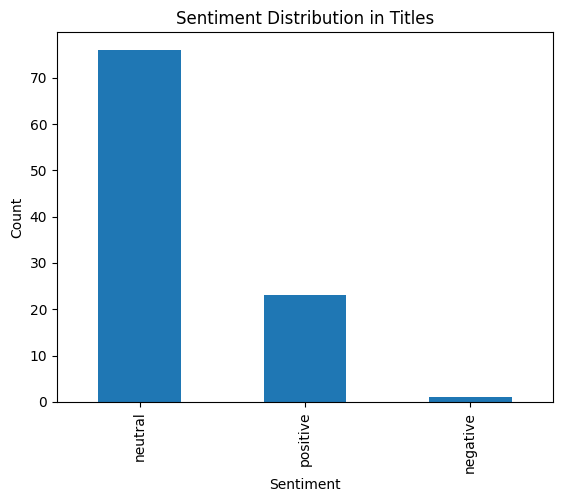

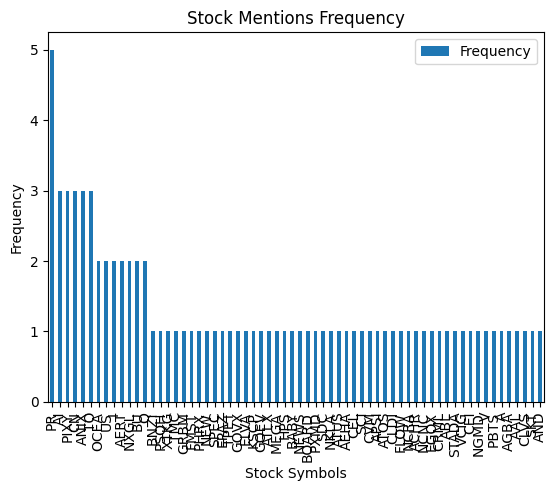

In [47]:
if not df.empty:
    def get_sentiment(text):
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'

    #  Sentiment Analysis
    df['Title Sentiment'] = df['Title'].apply(get_sentiment)
    df['Body Sentiment'] = df['Body'].apply(get_sentiment)

    # Frequency of Stock Mentions
    def extract_symbols(text):
        return re.findall(r'\b[A-Z]{1,5}\b', text)

    all_symbols = []
    for title in df['Title']:
        all_symbols.extend(extract_symbols(title))

    symbol_counts = Counter(all_symbols)

    symbol_df = pd.DataFrame(symbol_counts.items(), columns=['Symbol', 'Frequency']).sort_values(by='Frequency', ascending=False)

    print("Stock Mentions Frequency:")
    print(symbol_df)
    sentiment_counts = df['Title Sentiment'].value_counts()
    sentiment_counts.plot(kind='bar', title='Sentiment Distribution in Titles')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
    symbol_df.set_index('Symbol').plot(kind='bar', title='Stock Mentions Frequency')
    plt.xlabel('Stock Symbols')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No data available for sentiment analysis and visualization.")

In [51]:

df['Created'] = pd.to_datetime(df['Created'], unit='s')

daily_sentiment = df.groupby(df['Created'].dt.date).agg({
    'Title Sentiment': lambda x: x.value_counts().get('positive', 0),
    'Body Sentiment': lambda x: x.value_counts().get('positive', 0)
}).reset_index()

daily_sentiment.columns = ['Date', 'Positive Title Sentiment', 'Positive Body Sentiment']
asyncio.run(main())

[['*NEW PR!* $PIXY "ShiftPixy Labs Announces Development of Mobile Food Ordering Apps That Elevate Customer Engagement with Cutting-Edge Technology"',
  "***Link to PR:*** [*https://www.businesswire.com/news/home/20230217005009/en/ShiftPixy-Labs-Announces-Development-of-Mobile-Food-Ordering-Apps-That-Elevate-Customer-Engagement-with-Cutting-Edge-Technology*](https://www.businesswire.com/news/home/20230217005009/en/ShiftPixy-Labs-Announces-Development-of-Mobile-Food-Ordering-Apps-That-Elevate-Customer-Engagement-with-Cutting-Edge-Technology)\n\n*Insane gap up at open on the news out pre market this morning. Massive selling followed... keep an eye on this one, it's still way oversold. Shared the news on the sub from earlier in the week as well. Looks like the company is rolling again. Last time we saw this type of news flow from the company at this price, we saw a two session move to $10+. On heavy watch. Think* ***accumulation vs distribution*** *after todays price influx at open. 🙏*",


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7801cc3455d0>
ERROR:asyncio:Unclosed connector
connections: ['[(<aiohttp.client_proto.ResponseHandler object at 0x7801cc2e03a0>, 1111.672243061)]']
connector: <aiohttp.connector.TCPConnector object at 0x7801cc346560>


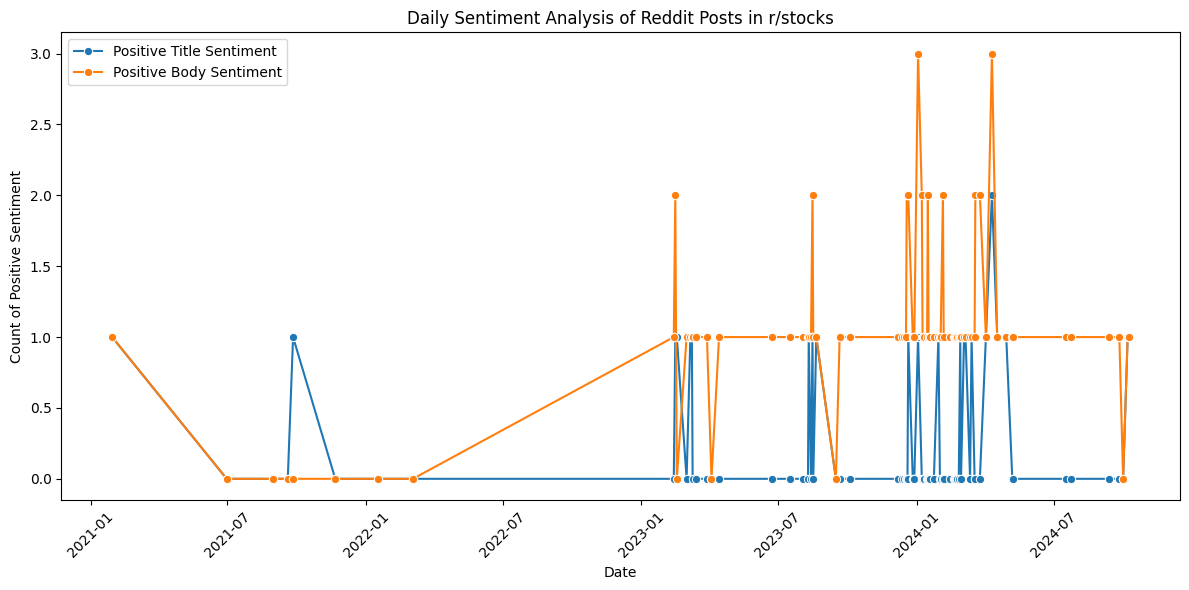

In [52]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment, x='Date', y='Positive Title Sentiment', label='Positive Title Sentiment', marker='o')
sns.lineplot(data=daily_sentiment, x='Date', y='Positive Body Sentiment', label='Positive Body Sentiment', marker='o')

plt.title('Daily Sentiment Analysis of Reddit Posts in r/stocks')
plt.xlabel('Date')
plt.ylabel('Count of Positive Sentiment')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
sentiment_counts = df['Title Sentiment'].value_counts()
print("Sentiment Counts:\n", sentiment_counts)

Sentiment Counts:
 Title Sentiment
neutral     76
positive    23
negative     1
Name: count, dtype: int64


In [54]:
buy_signal = df[(df['Title Sentiment'] == 'positive') | (df['Body Sentiment'] == 'positive')]
sell_signal = df[(df['Title Sentiment'] == 'negative') | (df['Body Sentiment'] == 'negative')]
print(f"\nPossible Buy Signals:\n{buy_signal[['Title', 'Body']]}")
print(f"\nPossible Sell Signals:\n{sell_signal[['Title', 'Body']]}")


Possible Buy Signals:
                                                Title  \
0   *NEW PR!* $PIXY "ShiftPixy Labs Announces Deve...   
1   Keeping a close eye on Aesther Healthcare Acqu...   
2                    Anyone following CEL-SCI ($CVM)?   
3                        Exploring Northern Graphite!   
4        Northern Graphite and the graphite industry!   
..                                                ...   
95                        Anyone following $MEGA.CN??   
96                      Burcon ($BU) and HPS team up!   
97                                 Thoughts on $BABY?   
98                       Anyone been following $NXGL?   
99  NEWS: WILLOW BIOSCIENCES ANNOUNCES CHANGES TO ...   

                                                 Body  
0   ***Link to PR:*** [*https://www.businesswire.c...  
1   A backstop agreement is a type of financial ar...  
2   Hey everyone! So, I was doing some reading up ...  
3   Just dropping in some quick news about Norther...  
4   Hey brot

In [59]:
df['Created'] = pd.to_datetime(df['Created'], unit='s')
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Title Sentiment'] = df['Title'].apply(get_sentiment)
df['Body Sentiment'] = df['Body'].apply(get_sentiment)
df['Overall Sentiment'] = (df['Title Sentiment'] + df['Body Sentiment']) / 2

In [56]:

buy_threshold = 0.1
sell_threshold = -0.1

buy_signals = df[df['Overall Sentiment'] > buy_threshold]
sell_signals = df[df['Overall Sentiment'] < sell_threshold]
print("Possible Buy Signals:")
print(buy_signals[['Title', 'Body', 'Overall Sentiment']].head(10))

print("\nPossible Sell Signals:")
print(sell_signals[['Title', 'Body', 'Overall Sentiment']].head(10))  # Display top 10 sell signals


Possible Buy Signals:
                                                Title  \
5   $APSI New PR Out! "Tradition Transportation Se...   
7                        Is $ANIX worth looking into?   
10  News from Ocean Biomedical (NASDAQ: OCEA): Det...   
13                 Anyone been looking into $FLOW.TO?   
18                      Looking forward to more $ANIX   
20                         Anyone checking out $ACHR?   
23  $CRML hit the NASDAQ, anyone been following them?   
24                              Any Thoughts on $ABL?   
26                  Anyone heard of Filament Health??   
28                  Snoop dog x Hempacco... Thoughts?   

                                                 Body  Overall Sentiment  
5   **PR:** [https://www.otcmarkets.com/stock/APSI...           0.162067  
7   Came across news about Anixa Biosciences (ANIX...           0.200000  
10  Just look at the price action today on OCEA. C...           0.167029  
13  I recently had an interesting experience while

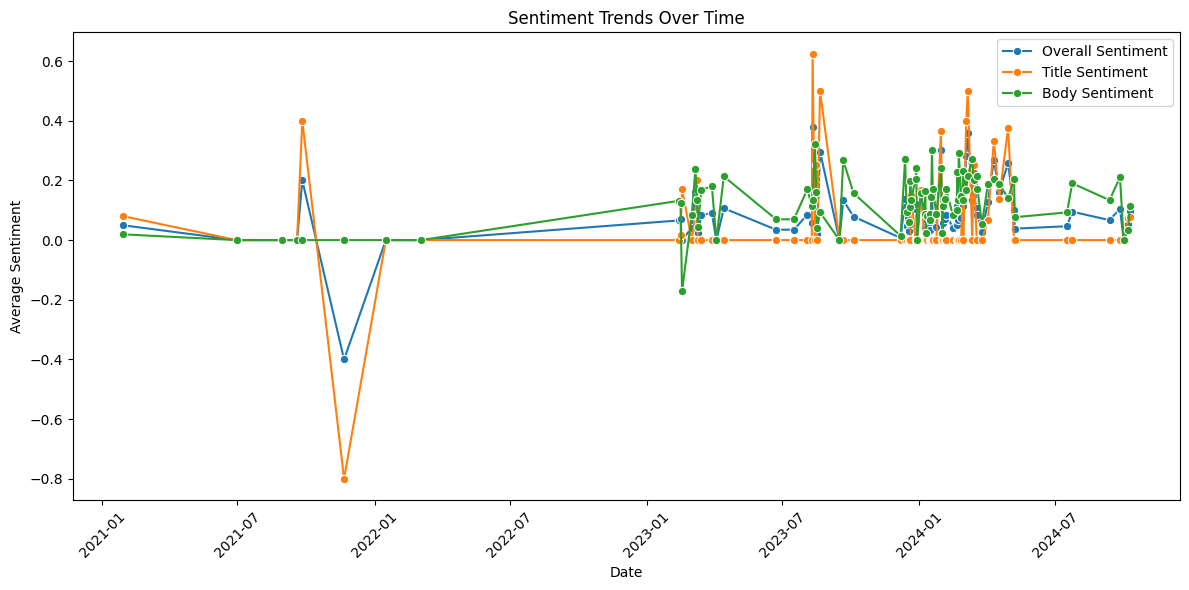

In [57]:

daily_sentiment = df.groupby(df['Created'].dt.date).agg({
    'Overall Sentiment': 'mean',
    'Title Sentiment': 'mean',
    'Body Sentiment': 'mean'
}).reset_index()

# Rename columns
daily_sentiment.columns = ['Date', 'Average Overall Sentiment', 'Average Title Sentiment', 'Average Body Sentiment']

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment, x='Date', y='Average Overall Sentiment', label='Overall Sentiment', marker='o')
sns.lineplot(data=daily_sentiment, x='Date', y='Average Title Sentiment', label='Title Sentiment', marker='o')
sns.lineplot(data=daily_sentiment, x='Date', y='Average Body Sentiment', label='Body Sentiment', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [58]:
def generate_recommendations(buy_signals, sell_signals):
    recommendations = []

    if not buy_signals.empty:
        recommendations.append("Based on the analysis, the following stocks show potential buy signals due to positive sentiment:")
        for index, row in buy_signals.iterrows():
            recommendations.append(f"- '{row['Title']}' with an overall sentiment of {row['Overall Sentiment']:.2f}")

    if not sell_signals.empty:
        recommendations.append("The following stocks show potential sell signals due to negative sentiment:")
        for index, row in sell_signals.iterrows():
            recommendations.append(f"- '{row['Title']}' with an overall sentiment of {row['Overall Sentiment']:.2f}")

    return recommendations

recommendations = generate_recommendations(buy_signals, sell_signals)

# Print recommendation
for rec in recommendations:
    print(rec)

Based on the analysis, the following stocks show potential buy signals due to positive sentiment:
- '$APSI New PR Out! "Tradition Transportation Sets New All-Time Record Freight Bids as Parent Company Aqua Power Charters Long Term Growth Strategy"' with an overall sentiment of 0.16
- 'Is $ANIX worth looking into?' with an overall sentiment of 0.20
- 'News from Ocean Biomedical (NASDAQ: OCEA): Detailed Research Data on Anti-Tumor Pathway Discoveries and Their Potential for Treatment of Non-Small Cell Lung Cancer, Metastatic Melanoma, and Glioblastoma' with an overall sentiment of 0.17
- 'Anyone been looking into $FLOW.TO?' with an overall sentiment of 0.13
- 'Looking forward to more $ANIX' with an overall sentiment of 0.36
- 'Anyone checking out $ACHR?' with an overall sentiment of 0.11
- '$CRML hit the NASDAQ, anyone been following them?' with an overall sentiment of 0.12
- 'Any Thoughts on $ABL?' with an overall sentiment of 0.11
- 'Anyone heard of Filament Health??' with an overall s